In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
settings = {}
settings['N'] = 2000 #Population size
settings['Nday'] = 240 # N Days of simulation
settings['N_meet_day'] = 2.3 #Average N of people met every day (poisson distribution)
settings['p_contagion'] = 0.3 #probability of contagion meeting a single sick person
settings['duration_days'] = 13 #Illness duration in days
settings['immunity_loss_days'] = 15 #Immunity duration after illnes

In [3]:
def simulate(Nday = settings['Nday'], N = settings['N'], p_contagion = settings['p_contagion'],
             N_meet_day=settings['N_meet_day'], duration_days = settings['duration_days'],
             immunity_loss_days = settings['immunity_loss_days'], immunity_loss = False, intrusion = -1):
    
    humans = np.zeros(N)
    contagion_era = np.zeros(N)
    immunity_era = np.zeros(N)
    humans[0] = 1
    sick = []
    immunized = []
    total_sick = 1

    for epoca in range(0,Nday):
        meeting_number = np.random.poisson(N_meet_day, N)
        contagion_era = contagion_era + np.where(humans==1,1,0)
        immunity_era = immunity_era + np.where(humans==-1,1,0)
        new_humans = np.copy(humans)
        # random meeting between people and contagion
        for i, p, nm in np.nditer([np.arange(N), humans, meeting_number]):
            met_people = np.random.choice(humans,nm,replace = False)

            x = p_contagion*np.sum(np.where(met_people>0,met_people,0))
            if (p == 0) and (np.random.random() < x):
                new_humans[i] = 1
                total_sick = total_sick + 1
            else:
                new_humans[i] = p
                
        #illnes duration for every sick person
        if immunity_loss and immunity_loss_days > 1:
            for i,e in np.nditer([np.arange(N),contagion_era]):
                if e > duration_days:
                    new_humans[i] = -1
        
        # immunity loss
        if immunity_loss:
            for i,e in np.nditer([np.arange(N),immunity_era]):
                if e > immunity_loss_days:
                    new_humans[i] = 0
        
        #illness return...
        if (intrusion > 0) and (epoca == intrusion):
            new_humans[0] = 1
            print(new_humans)
            
                
        humans = np.copy(new_humans)
        
        sick.append(np.sum(np.where(humans==1,1,0)))
        immunized.append(np.sum(np.where(humans==-1,1,0)))

    return sick, immunized, total_sick

In [5]:
sick, immunized, total_sick = simulate(p_contagion=0.1, N_meet_day= 3, N=500, immunity_loss=True,
                                       immunity_loss_days=10, intrusion = 100)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

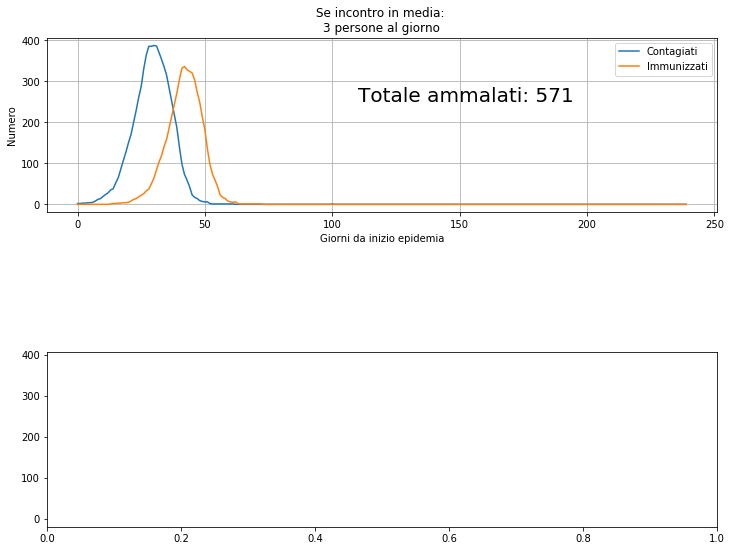

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(12, 9), sharey=True)
plt.subplots_adjust(hspace = 0.8)
axs[0].plot(range(0,settings['Nday']), sick, label = 'Contagiati')
axs[0].plot(range(0,settings['Nday']), immunized, label = 'Immunizzati')
axs[0].set(xlabel="Giorni da inizio epidemia", ylabel='Numero', title='Se incontro in media: \n'+str(int(3))+ ' persone al giorno')
axs[0].annotate('Totale ammalati: '+str(total_sick),xy=(110, 250), fontsize=20)
axs[0].grid()
axs[0].legend()

## Two cases...

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 9), sharey=True)
plt.subplots_adjust(hspace = 0.8)
nmd = 20.0
sick, immunized, total_sick = simulate(p_contagion=0.1, N_meet_day= nmd, N=500, immunity_loss=True,
                                       immunity_loss_days=10, intrusion = 100)
axs[0].plot(range(0,settings['Nday']), sick, label = 'Contagiati')
axs[0].plot(range(0,settings['Nday']), immunized, label = 'Immunizzati')
axs[0].set(xlabel="Giorni da inizio epidemia", ylabel='Numero', title='Se incontro in media: \n'+str(int(nmd))+ ' persone al giorno')
axs[0].annotate('Totale ammalati: '+str(total_sick),xy=(110, 250), fontsize=20)
axs[0].grid()
axs[0].legend()

nmd = 2.0
sick, immunized, total_sick = simulate(p_contagion=0.1, N_meet_day= nmd, N=500, immunity_loss=True,
                                       immunity_loss_days=10, intrusion = 100)
axs[1].plot(range(0,settings['Nday']), sick, label = 'Contagiati')
axs[1].plot(range(0,settings['Nday']), immunized, label = 'Immunizzati')
axs[1].set(xlabel="Giorni da inizio epidemia", ylabel='Numero', title='Se incontro in media: \n'+str(int(nmd))+ ' persone al giorno')
axs[1].annotate('Totale ammalati: '+str(total_sick),xy=(110, 300), fontsize=20)
axs[1].grid()
axs[1].legend()
plt.show()

## N-scaling

In [ ]:
pop_sizes = [100,200,500,1000,2000,5000,10000]
peak_day=[]
for pop_size in pop_sizes:
    sick, immunized, total_sick = simulate(p_contagion=0.1, N_meet_day= 2, N = pop_size)
    peak_day.append(np.argmax(sick))
peak_day

In [ ]:
pop_sizes = [100,200,500,1000,2000,5000,10000]
peak_day_2=[]
for pop_size in pop_sizes:
    sick, immunized, total_sick = simulate(p_contagion=0.1, N_meet_day= 4, N = pop_size, Nday=60)
    peak_day_2.append(np.argmax(sick))
peak_day_2

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(pop_sizes, peak_day)
plt.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(pop_sizes, peak_day_2)
plt.plot()